In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gtfparse import read_gtf
from scipy.stats import fisher_exact
from matplotlib.lines import Line2D

In [7]:
def convert_pval(pval):
    if pval < 0.0001:
        return('****')
    elif pval < 0.001:
        return('***')
    elif pval < 0.01:
        return('**')
    elif pval < 0.05:
        return('*')
    else:
        return('NS')

In [8]:
genes = read_gtf('/DATA/users/m.magnitov/genomes/gencode.v42.basic.annotation.gtf')
genes = genes[genes['feature'] == 'gene']
genes = genes[['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']]

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


## Overlap between allele-specific genes

In [9]:
# Read ASE data
data_path = '/DATA/users/m.magnitov/hap_phen/TTseq'

ase_NA12878 = pd.read_csv(data_path + '/ase/NA12878_allele_specific.bed', sep = '\t', header = None)
ase_NA18983 = pd.read_csv(data_path + '/ase/NA18983_allele_specific.bed', sep = '\t', header = None)
ase_HG01241 = pd.read_csv(data_path + '/ase/HG01241_allele_specific.bed', sep = '\t', header = None)
ase_HG02601 = pd.read_csv(data_path + '/ase/HG02601_allele_specific.bed', sep = '\t', header = None)
ase_HG03464 = pd.read_csv(data_path + '/ase/HG03464_allele_specific.bed', sep = '\t', header = None)

In [10]:
ase_counts = np.unique(list(ase_NA12878[6].values) + list(ase_NA18983[6].values) + list(ase_HG01241[6].values) + list(ase_HG02601[6].values) + list(ase_HG03464[6].values), return_counts = 1)
ase_counts = pd.DataFrame(ase_counts).transpose().sort_values(1, ascending = False)
ase_counts.columns = ['gene_id', 'cell_line_count']
ase_counts = ase_counts.merge(genes, on = 'gene_id')
ase_counts['gene_id'] = [x.split('.')[0] for x in ase_counts['gene_id'].values]
ase_counts[ase_counts['cell_line_count'] > 3]

,gene_id,cell_line_count,seqname,start,end,strand,gene_type,gene_name
0,ENSG00000235590,5,chr20,58818918,58850903,-,lncRNA,GNAS-AS1
1,ENSG00000224078,5,chr15,24978583,25420336,+,lncRNA,SNHG14
2,ENSG00000269821,5,chr11,2608328,2699994,-,lncRNA,KCNQ1OT1
3,ENSG00000254319,4,chr8,2648075,2728577,-,lncRNA,LINC03021
4,ENSG00000291130,4,chr19,20340262,20424986,-,lncRNA,ENSG00000291130
5,ENSG00000128408,4,chr22,45413693,45432509,+,protein_coding,RIBC2
6,ENSG00000228789,4,chr6,31053450,31059890,+,protein_coding,HCG22
7,ENSG00000127990,4,chr7,94524204,94656572,-,protein_coding,SGCE
8,ENSG00000211900,4,chr14,105863198,105863258,-,IG_J_gene,IGHJ6
9,ENSG00000122565,4,chr7,26201162,26213607,+,protein_coding,CBX3


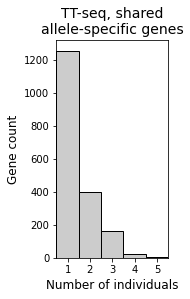

In [11]:
plt.figure(figsize = (2, 4))
plt.title('TT-seq, shared\nallele-specific genes', fontsize = 14)
plt.hist(ase_counts['cell_line_count'], range = (0, 6), bins = 6, color = '#CCCCCC', edgecolor = 'k')
plt.xticks(np.arange(5)+1.5, [1, 2, 3, 4, 5])
plt.xlim((1, 6))
plt.xlabel('Number of individuals', fontsize = 12)
plt.ylabel('Gene count', fontsize = 12)
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_shared_ttseq_peaks.pdf', bbox_inches = 'tight')
plt.show()

## Overlap with public gene sets

In [14]:
deseq_NA12878 = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_NA12878.csv', sep = '\s+', header = 0)
deseq_NA12878['gene_id'] = deseq_NA12878.index
deseq_NA12878 = deseq_NA12878.merge(genes, on = 'gene_id')
deseq_NA12878['gene_id'] = [x.split('.')[0] for x in deseq_NA12878['gene_id']]
ase_NA12878 = list(deseq_NA12878[(deseq_NA12878['padj'] < 0.1) & (abs(deseq_NA12878['log2FoldChange']) > 1)]['gene_id'].values)
non_ase_NA12878 = list(deseq_NA12878[~deseq_NA12878['gene_id'].isin(ase_NA12878)]['gene_id'].values)

deseq_NA18983 = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_NA18983.csv', sep = '\s+', header = 0)
deseq_NA18983['gene_id'] = deseq_NA18983.index
deseq_NA18983 = deseq_NA18983.merge(genes, on = 'gene_id')
deseq_NA18983['gene_id'] = [x.split('.')[0] for x in deseq_NA18983['gene_id']]
ase_NA18983 = list(deseq_NA18983[(deseq_NA18983['padj'] < 0.1) & (abs(deseq_NA18983['log2FoldChange']) > 1)]['gene_id'].values)
non_ase_NA18983 = list(deseq_NA18983[~deseq_NA18983['gene_id'].isin(ase_NA18983)]['gene_id'].values)

deseq_HG01241 = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_HG01241.csv', sep = '\s+', header = 0)
deseq_HG01241['gene_id'] = deseq_HG01241.index
deseq_HG01241 = deseq_HG01241.merge(genes, on = 'gene_id')
deseq_HG01241['gene_id'] = [x.split('.')[0] for x in deseq_HG01241['gene_id']]
ase_HG01241 = list(deseq_HG01241[(deseq_HG01241['padj'] < 0.1) & (abs(deseq_HG01241['log2FoldChange']) > 1)]['gene_id'].values)
non_ase_HG01241 = list(deseq_HG01241[~deseq_HG01241['gene_id'].isin(ase_HG01241)]['gene_id'].values)

deseq_HG02601 = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_HG02601.csv', sep = '\s+', header = 0)
deseq_HG02601['gene_id'] = deseq_HG02601.index
deseq_HG02601 = deseq_HG02601.merge(genes, on = 'gene_id')
deseq_HG02601['gene_id'] = [x.split('.')[0] for x in deseq_HG02601['gene_id']]
ase_HG02601 = list(deseq_HG02601[(deseq_HG02601['padj'] < 0.1) & (abs(deseq_HG02601['log2FoldChange']) > 1)]['gene_id'].values)
non_ase_HG02601 = list(deseq_HG02601[~deseq_HG02601['gene_id'].isin(ase_HG02601)]['gene_id'].values)

deseq_HG03464 = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_HG03464.csv', sep = '\s+', header = 0)
deseq_HG03464['gene_id'] = deseq_HG03464.index
deseq_HG03464 = deseq_HG03464.merge(genes, on = 'gene_id')
deseq_HG03464['gene_id'] = [x.split('.')[0] for x in deseq_HG03464['gene_id']]
ase_HG03464 = list(deseq_HG03464[(deseq_HG03464['padj'] < 0.1) & (abs(deseq_HG03464['log2FoldChange']) > 1)]['gene_id'].values)
non_ase_HG03464 = list(deseq_HG03464[~deseq_HG03464['gene_id'].isin(deseq_HG03464)]['gene_id'].values)

### Imprinted genes

In [15]:
imp_genes = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/public_data/imprinted_genes_geneimprint.txt', sep = '\t', header = None)
imp_genes_list = imp_genes[0].values
print('Imprinted genes:', len(imp_genes))
imp_genes.head()

Imprinted genes: 119


,0,1
0,ENSG00000111863,ADTRP
1,ENSG00000112297,CRYBG1
2,ENSG00000131620,ANO1
3,ENSG00000206190,ATP10A
4,ENSG00000180389,ATP5F1EP2


NA12878:
	Allele-specific: 8 / 481
	Balanced: 25 / 11472
	OR = 7.7 , p-value = 3.701150139169511e-05 ****
NA18983:
	Allele-specific: 8 / 338
	Balanced: 19 / 10070
	OR = 12.8 , p-value = 1.4730647214334767e-06 ****
HG01241:
	Allele-specific: 8 / 463
	Balanced: 22 / 12102
	OR = 9.7 , p-value = 9.155543064718262e-06 ****
HG02601:
	Allele-specific: 9 / 509
	Balanced: 22 / 11097
	OR = 9.1 , p-value = 4.748397790077669e-06 ****
HG03464:
	Allele-specific: 11 / 861
	Balanced: 35 / 13310
	OR = 4.9 , p-value = 7.312405317080261e-05 ****


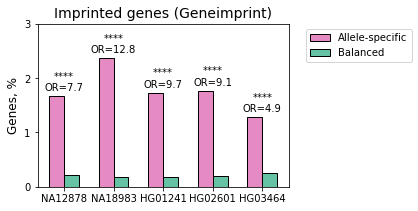

In [16]:
fraction_ase = [len([x for x in ase_NA12878 if x in imp_genes_list]) / len(ase_NA12878) * 100,
                len([x for x in ase_NA18983 if x in imp_genes_list]) / len(ase_NA18983) * 100,
                len([x for x in ase_HG01241 if x in imp_genes_list]) / len(ase_HG01241) * 100,
                len([x for x in ase_HG02601 if x in imp_genes_list]) / len(ase_HG02601) * 100,
                len([x for x in ase_HG03464 if x in imp_genes_list]) / len(ase_HG03464) * 100]

fraction_non_ase = [len([x for x in non_ase_NA12878 if x in imp_genes_list]) / len(non_ase_NA12878) * 100,
                    len([x for x in non_ase_NA18983 if x in imp_genes_list]) / len(non_ase_NA18983) * 100,
                    len([x for x in non_ase_HG01241 if x in imp_genes_list]) / len(non_ase_HG01241) * 100,
                    len([x for x in non_ase_HG02601 if x in imp_genes_list]) / len(non_ase_HG02601) * 100,
                    len([x for x in non_ase_HG03464 if x in imp_genes_list]) / len(non_ase_HG03464) * 100]

anno_plot = []
for (exp, ase, non_ase) in zip(['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'],
                               [ase_NA12878, ase_NA18983, ase_HG01241, ase_HG02601, ase_HG03464],
                               [non_ase_NA12878, non_ase_NA18983, non_ase_HG01241, non_ase_HG02601, non_ase_HG03464]):
    
    odds, pval = fisher_exact([[len([x for x in ase if x in imp_genes_list]), 
                                len([x for x in non_ase if x in imp_genes_list])],
                               [len(ase)-len([x for x in ase if x in imp_genes_list]),
                                len(non_ase)-len([x for x in non_ase if x in imp_genes_list])]], alternative = 'two-sided')
    anno_plot.append(convert_pval(pval) + '\nOR=' + str(round(odds, 1)))
    print(exp + ':')
    print('\tAllele-specific:', len([x for x in ase if x in imp_genes_list]), '/', len(ase))
    print('\tBalanced:', len([x for x in non_ase if x in imp_genes_list]), '/', len(non_ase))
    print('\tOR =', round(odds, 1), ', p-value =', pval, convert_pval(pval))
    
plt.figure(figsize = (4.5, 3))
plt.title('Imprinted genes (Geneimprint)', fontsize = 14)
plt.bar(x = np.arange(5)-0.15, height = fraction_ase, width = 0.3, color = '#E68AC3', edgecolor = 'k', lw = 1, label = 'Allele-specific')
plt.bar(x = np.arange(5)+0.15, height = fraction_non_ase, width = 0.3, color = '#66C2A5', edgecolor = 'k', lw = 1, label = 'Balanced')
for (ann, x, y) in zip(anno_plot, np.arange(5), fraction_ase):
    plt.text(x, y + 0.1, s = ann, ha = 'center')
plt.xticks([0, 1, 2, 3, 4], ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 10)
plt.yticks([0, 1, 2, 3])
plt.ylabel('Genes, %', fontsize = 12)
plt.ylim((0, 3))
plt.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_overlap_imprinted_genes.pdf', bbox_inches = 'tight')
plt.show()

### IG and MHC genes

In [29]:
ig_genes = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/public_data/immunoglobulin_complex_go_term.txt', sep = '\t', header = None)
ig_genes_list = ig_genes[0].values
print('IG genes:', len(ig_genes))
ig_genes.head()

IG genes: 516


,0,1
0,ENSG00000275063,NaN
1,ENSG00000277856,NaN
2,ENSG00000277836,NaN
3,ENSG00000277282,IGHV1OR21-1
4,ENSG00000270505,IGHV1OR15-1


In [30]:
mhc_genes = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/public_data/mhc_protein_complex_go_term.txt', sep = '\t', header = None)
mhc_genes_list = mhc_genes[0].values
print('MHC genes:', len(mhc_genes))
mhc_genes.head()

MHC genes: 669


,0,1
0,ENSG00000204642,HLA-F
1,ENSG00000204642,HLA-F
2,ENSG00000204642,HLA-F
3,ENSG00000204642,HLA-F
4,ENSG00000204642,HLA-F


NA12878:
	Allele-specific: 2 / 481
	Balanced: 28 / 11472
	OR = 1.7 , p-value = 0.3415699220330636 NS
NA18983:
	Allele-specific: 7 / 338
	Balanced: 29 / 10070
	OR = 7.3 , p-value = 0.00013256515559079975 ***
HG01241:
	Allele-specific: 12 / 463
	Balanced: 26 / 12102
	OR = 12.4 , p-value = 6.155777665663603e-09 ****
HG02601:
	Allele-specific: 11 / 509
	Balanced: 28 / 11097
	OR = 8.7 , p-value = 5.682530439166951e-07 ****
HG03464:
	Allele-specific: 12 / 861
	Balanced: 41 / 13310
	OR = 4.6 , p-value = 6.177027060560577e-05 ****


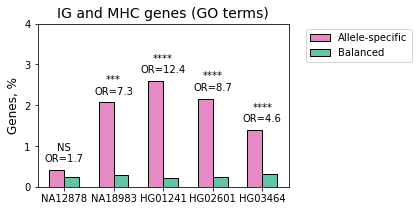

In [33]:
ig_mhc_genes_list = np.array(list(mhc_genes_list) + list(ig_genes_list))

fraction_ase = [len([x for x in ase_NA12878 if x in ig_mhc_genes_list]) / len(ase_NA12878) * 100,
                len([x for x in ase_NA18983 if x in ig_mhc_genes_list]) / len(ase_NA18983) * 100,
                len([x for x in ase_HG01241 if x in ig_mhc_genes_list]) / len(ase_HG01241) * 100,
                len([x for x in ase_HG02601 if x in ig_mhc_genes_list]) / len(ase_HG02601) * 100,
                len([x for x in ase_HG03464 if x in ig_mhc_genes_list]) / len(ase_HG03464) * 100]

fraction_non_ase = [len([x for x in non_ase_NA12878 if x in ig_mhc_genes_list]) / len(non_ase_NA12878) * 100,
                    len([x for x in non_ase_NA18983 if x in ig_mhc_genes_list]) / len(non_ase_NA18983) * 100,
                    len([x for x in non_ase_HG01241 if x in ig_mhc_genes_list]) / len(non_ase_HG01241) * 100,
                    len([x for x in non_ase_HG02601 if x in ig_mhc_genes_list]) / len(non_ase_HG02601) * 100,
                    len([x for x in non_ase_HG03464 if x in ig_mhc_genes_list]) / len(non_ase_HG03464) * 100]

anno_plot = []
for (exp, ase, non_ase) in zip(['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'],
                               [ase_NA12878, ase_NA18983, ase_HG01241, ase_HG02601, ase_HG03464],
                               [non_ase_NA12878, non_ase_NA18983, non_ase_HG01241, non_ase_HG02601, non_ase_HG03464]):
    
    odds, pval = fisher_exact([[len([x for x in ase if x in ig_mhc_genes_list]), 
                                len([x for x in non_ase if x in ig_mhc_genes_list])],
                               [len(ase)-len([x for x in ase if x in ig_mhc_genes_list]),
                                len(non_ase)-len([x for x in non_ase if x in ig_mhc_genes_list])]], alternative = 'two-sided')
    anno_plot.append(convert_pval(pval) + '\nOR=' + str(round(odds, 1)))
    print(exp + ':')
    print('\tAllele-specific:', len([x for x in ase if x in ig_mhc_genes_list]), '/', len(ase))
    print('\tBalanced:', len([x for x in non_ase if x in ig_mhc_genes_list]), '/', len(non_ase))
    print('\tOR =', round(odds, 1), ', p-value =', pval, convert_pval(pval))
    
plt.figure(figsize = (4.5, 3))
plt.title('IG and MHC genes (GO terms)', fontsize = 14)
plt.bar(x = np.arange(5)-0.15, height = fraction_ase, width = 0.3, color = '#E68AC3', edgecolor = 'k', lw = 1, label = 'Allele-specific')
plt.bar(x = np.arange(5)+0.15, height = fraction_non_ase, width = 0.3, color = '#66C2A5', edgecolor = 'k', lw = 1, label = 'Balanced')
for (ann, x, y) in zip(anno_plot, np.arange(5), fraction_ase):
    plt.text(x, y + 0.2, s = ann, ha = 'center')
plt.xticks([0, 1, 2, 3, 4], ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 10)
plt.yticks([0, 1, 2, 3, 4])
plt.ylabel('Genes, %', fontsize = 12)
plt.ylim((0, 4))
plt.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_overlap_igg_mhc_genes.pdf', bbox_inches = 'tight')
plt.show()

### Random allelic expression genes (Kravitz et al.)

In [28]:
rae_genes = pd.read_excel('/DATA/users/m.magnitov/hap_phen/TTseq/public_data/kravitz_rae.xlsx', sheet_name = 'hc-RAE (all tissues)')
rae_genes_list = [x.split('.')[0] for x in rae_genes['gene_id'].values]
print('RAE genes:', len(rae_genes))
rae_genes.head()

RAE genes: 2762


,chr,gene_id,gene_name,gene_start,gene_stop,total_sample_count_male,z_score_male,total_sample_count_female,z_score_female
0,1,ENSG00000268903.1,RP11-34P13.15,135140,135895,61,5.280027,45,5.133740
1,1,ENSG00000230021.8,RP5-857K21.4,585988,827796,371,1.823233,192,1.397376
2,1,ENSG00000223764.2,RP11-54O7.3,916869,919692,319,1.084753,173,0.808534
3,1,ENSG00000187642.9,PERM1,975203,982093,322,2.195854,151,1.663140
4,1,ENSG00000272512.1,RP11-54O7.17,995965,998051,239,1.025967,106,0.748920


NA12878:
	Allele-specific: 61 / 481
	Balanced: 1147 / 11472
	OR = 1.3 , p-value = 0.06338723221617938 NS
NA18983:
	Allele-specific: 74 / 338
	Balanced: 1023 / 10070
	OR = 2.5 , p-value = 6.520716816464851e-10 ****
HG01241:
	Allele-specific: 89 / 463
	Balanced: 1160 / 12102
	OR = 2.2 , p-value = 9.38051672778176e-10 ****
HG02601:
	Allele-specific: 66 / 509
	Balanced: 1098 / 11097
	OR = 1.4 , p-value = 0.028382000472157342 *
HG03464:
	Allele-specific: 96 / 861
	Balanced: 1285 / 13310
	OR = 1.2 , p-value = 0.15464727720591823 NS


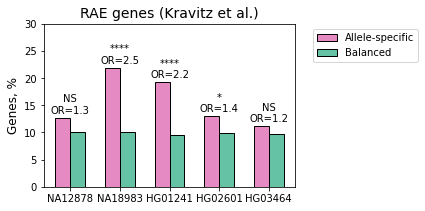

In [29]:
fraction_ase = [len([x for x in ase_NA12878 if x in rae_genes_list]) / len(ase_NA12878) * 100,
                len([x for x in ase_NA18983 if x in rae_genes_list]) / len(ase_NA18983) * 100,
                len([x for x in ase_HG01241 if x in rae_genes_list]) / len(ase_HG01241) * 100,
                len([x for x in ase_HG02601 if x in rae_genes_list]) / len(ase_HG02601) * 100,
                len([x for x in ase_HG03464 if x in rae_genes_list]) / len(ase_HG03464) * 100]

fraction_non_ase = [len([x for x in non_ase_NA12878 if x in rae_genes_list]) / len(non_ase_NA12878) * 100,
                    len([x for x in non_ase_NA18983 if x in rae_genes_list]) / len(non_ase_NA18983) * 100,
                    len([x for x in non_ase_HG01241 if x in rae_genes_list]) / len(non_ase_HG01241) * 100,
                    len([x for x in non_ase_HG02601 if x in rae_genes_list]) / len(non_ase_HG02601) * 100,
                    len([x for x in non_ase_HG03464 if x in rae_genes_list]) / len(non_ase_HG03464) * 100]

anno_plot = []
for (exp, ase, non_ase) in zip(['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'],
                               [ase_NA12878, ase_NA18983, ase_HG01241, ase_HG02601, ase_HG03464],
                               [non_ase_NA12878, non_ase_NA18983, non_ase_HG01241, non_ase_HG02601, non_ase_HG03464]):
    
    odds, pval = fisher_exact([[len([x for x in ase if x in rae_genes_list]), 
                                len([x for x in non_ase if x in rae_genes_list])],
                               [len(ase)-len([x for x in ase if x in rae_genes_list]),
                                len(non_ase)-len([x for x in non_ase if x in rae_genes_list])]], alternative = 'two-sided')
    anno_plot.append(convert_pval(pval) + '\nOR=' + str(round(odds, 1)))
    print(exp + ':')
    print('\tAllele-specific:', len([x for x in ase if x in rae_genes_list]), '/', len(ase))
    print('\tBalanced:', len([x for x in non_ase if x in rae_genes_list]), '/', len(non_ase))
    print('\tOR =', round(odds, 1), ', p-value =', pval, convert_pval(pval))
    
plt.figure(figsize = (4.5, 3))
plt.title('RAE genes (Kravitz et al.)', fontsize = 14)
plt.bar(x = np.arange(5)-0.15, height = fraction_ase, width = 0.3, color = '#E68AC3', edgecolor = 'k', lw = 1, label = 'Allele-specific')
plt.bar(x = np.arange(5)+0.15, height = fraction_non_ase, width = 0.3, color = '#66C2A5', edgecolor = 'k', lw = 1, label = 'Balanced')
for (ann, x, y) in zip(anno_plot, np.arange(5), fraction_ase):
    plt.text(x, y + 0.8, s = ann, ha = 'center')
plt.xticks([0, 1, 2, 3, 4], ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 10)
plt.yticks([0, 5, 10, 15, 20, 25, 30])
plt.ylabel('Genes, %', fontsize = 12)
plt.ylim((0, 30))
plt.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_overlap_random_allelic_genes.pdf', bbox_inches = 'tight')
plt.show()

In [26]:
bi_genes = pd.read_excel('/DATA/users/m.magnitov/hap_phen/TTseq/public_data/kravitz_rae.xlsx', sheet_name = 'hc-Biallelic (all tissues)')
bi_genes_list = [x.split('.')[0] for x in bi_genes['gene_id'].values]
print('Biallelic genes:', len(bi_genes))
bi_genes.head()

Biallelic genes: 14221


,chr,gene_id,gene_name,gene_start,gene_stop,total_sample_count_male,z_score_male,total_sample_count_female,z_score_female
0,1,ENSG00000228463.9,AP006222.2,257863,297502,27,-0.922397,6,-0.866394
1,1,ENSG00000229344.1,MTCO2P12,632756,633438,33,-0.260950,6,-0.866394
2,1,ENSG00000228327.3,RP11-206L10.2,725884,778626,156,-0.549273,83,-0.787051
3,1,ENSG00000237491.8,RP11-206L10.9,778769,810060,144,-0.063434,76,-0.606440
4,1,ENSG00000230092.7,RP11-206L10.8,800878,810170,58,-0.044269,34,-0.672703


NA12878:
	Allele-specific: 66 / 481
	Balanced: 6290 / 11472
	OR = 0.1 , p-value = 6.246718378653426e-76 ****
NA18983:
	Allele-specific: 104 / 338
	Balanced: 5643 / 10070
	OR = 0.3 , p-value = 3.982420738285037e-20 ****
HG01241:
	Allele-specific: 130 / 463
	Balanced: 6773 / 12102
	OR = 0.3 , p-value = 1.2168190224431192e-32 ****
HG02601:
	Allele-specific: 103 / 509
	Balanced: 6124 / 11097
	OR = 0.2 , p-value = 2.9681029245096016e-56 ****
HG03464:
	Allele-specific: 202 / 861
	Balanced: 7061 / 13310
	OR = 0.3 , p-value = 3.122074999980799e-66 ****


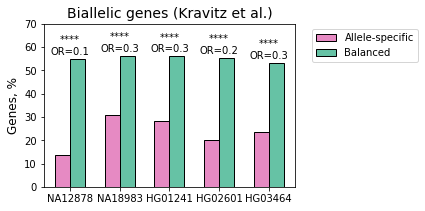

In [27]:
fraction_ase = [len([x for x in ase_NA12878 if x in bi_genes_list]) / len(ase_NA12878) * 100,
                len([x for x in ase_NA18983 if x in bi_genes_list]) / len(ase_NA18983) * 100,
                len([x for x in ase_HG01241 if x in bi_genes_list]) / len(ase_HG01241) * 100,
                len([x for x in ase_HG02601 if x in bi_genes_list]) / len(ase_HG02601) * 100,
                len([x for x in ase_HG03464 if x in bi_genes_list]) / len(ase_HG03464) * 100]

fraction_non_ase = [len([x for x in non_ase_NA12878 if x in bi_genes_list]) / len(non_ase_NA12878) * 100,
                    len([x for x in non_ase_NA18983 if x in bi_genes_list]) / len(non_ase_NA18983) * 100,
                    len([x for x in non_ase_HG01241 if x in bi_genes_list]) / len(non_ase_HG01241) * 100,
                    len([x for x in non_ase_HG02601 if x in bi_genes_list]) / len(non_ase_HG02601) * 100,
                    len([x for x in non_ase_HG03464 if x in bi_genes_list]) / len(non_ase_HG03464) * 100]

anno_plot = []
for (exp, ase, non_ase) in zip(['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'],
                               [ase_NA12878, ase_NA18983, ase_HG01241, ase_HG02601, ase_HG03464],
                               [non_ase_NA12878, non_ase_NA18983, non_ase_HG01241, non_ase_HG02601, non_ase_HG03464]):
    
    odds, pval = fisher_exact([[len([x for x in ase if x in bi_genes_list]), 
                                len([x for x in non_ase if x in bi_genes_list])],
                               [len(ase)-len([x for x in ase if x in bi_genes_list]),
                                len(non_ase)-len([x for x in non_ase if x in bi_genes_list])]], alternative = 'two-sided')
    anno_plot.append(convert_pval(pval) + '\nOR=' + str(round(odds, 1)))
    print(exp + ':')
    print('\tAllele-specific:', len([x for x in ase if x in bi_genes_list]), '/', len(ase))
    print('\tBalanced:', len([x for x in non_ase if x in bi_genes_list]), '/', len(non_ase))
    print('\tOR =', round(odds, 1), ', p-value =', pval, convert_pval(pval))
    
plt.figure(figsize = (4.5, 3))
plt.title('Biallelic genes (Kravitz et al.)', fontsize = 14)
plt.bar(x = np.arange(5)-0.15, height = fraction_ase, width = 0.3, color = '#E68AC3', edgecolor = 'k', lw = 1, label = 'Allele-specific')
plt.bar(x = np.arange(5)+0.15, height = fraction_non_ase, width = 0.3, color = '#66C2A5', edgecolor = 'k', lw = 1, label = 'Balanced')
for (ann, x, y) in zip(anno_plot, np.arange(5), fraction_non_ase):
    plt.text(x, y + 2, s = ann, ha = 'center')
plt.xticks([0, 1, 2, 3, 4], ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 10)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
plt.ylabel('Genes, %', fontsize = 12)
plt.ylim((0, 70))
plt.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_overlap_biallelic_genes.pdf', bbox_inches = 'tight')
plt.show()